<a href="https://colab.research.google.com/github/Ritesh24f1001677/Net_Zero-Maturity-Model-IIT-BHU-INTERNSHIP/blob/main/gurobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 50.1 MB/s eta 0:00:00


In [2]:
import os

os.environ["GRB_WLSACCESSID"] = "f0389772-6d80-40b8-b009-bbb718dc396b"
os.environ["GRB_WLSSECRET"] = "4ebb9e1d-f782-4b07-aece-14f7ed007299"
os.environ["GRB_LICENSEID"] = "2762601"


In [3]:
import gurobipy as gp
from gurobipy import GRB

try:
    model = gp.Model("license_test")

    x = model.addVar(name="x")
    y = model.addVar(name="y")

    model.setObjective(x + y, GRB.MAXIMIZE)
    model.addConstr(x + 2*y <= 4)

    model.optimize()

    print("✅ Gurobi license is working!")
except gp.GurobiError as e:
    print("❌ Gurobi error:", e)


Restricted license - for non-production use only - expires 2027-11-29
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 2 columns and 2 nonzeros (Max)
Model fingerprint: 0x31e8eabe
Model has 2 linear objective coefficients
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 4e+00]
Presolve removed 1 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.000000000e+00
✅ Gurobi license is working!


In [4]:
import gurobipy as gp
from gurobipy import GRB

# --------------------------------------------------
# Step 1: Create the optimization model
# --------------------------------------------------
model = gp.Model("Daily_Profit_Maximization")

# --------------------------------------------------
# Step 2: Define decision variables
# x1, x2, x3 ≥ 0
# --------------------------------------------------
x1 = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="x1")
x2 = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="x2")
x3 = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="x3")

# --------------------------------------------------
# Step 3: Set the objective function (Maximize)
# Z = 4x1 + 3x2 + 6x3
# --------------------------------------------------
model.setObjective(
    4 * x1 + 3 * x2 + 6 * x3,
    GRB.MAXIMIZE
)

# --------------------------------------------------
# Step 4: Add constraints
# --------------------------------------------------

# Machine M1 constraint
model.addConstr(
    2 * x1 + 3 * x2 + 2 * x3 <= 440,
    name="Machine_M1"
)

# Machine M2 constraint
model.addConstr(
    4 * x1 + 3 * x3 <= 470,
    name="Machine_M2"
)

# Machine M3 constraint
model.addConstr(
    2 * x1 + 5 * x2 <= 430,
    name="Machine_M3"
)

# --------------------------------------------------
# Step 5: Optimize the model
# --------------------------------------------------
model.optimize()

# --------------------------------------------------
# Step 6: Display results
# --------------------------------------------------
if model.status == GRB.OPTIMAL:
    print("\nOptimal Solution Found")
    print(f"x1 = {x1.x:.2f}")
    print(f"x2 = {x2.x:.2f}")
    print(f"x3 = {x3.x:.2f}")
    print(f"Maximum Profit Z = {model.objVal:.2f}")
else:
    print("No optimal solution found")


Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 3 rows, 3 columns and 7 nonzeros (Max)
Model fingerprint: 0x45c96bcd
Model has 3 linear objective coefficients
Coefficient statistics:
  Matrix range     [2e+00, 5e+00]
  Objective range  [3e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 5e+02]
Presolve time: 0.00s
Presolved: 3 rows, 3 columns, 7 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3000000e+31   4.375000e+30   1.300000e+01      0s
       2    1.0666667e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.066666667e+03

Optimal Solution Found
x1 = 0.00
x2 = 42.22
x3 = 156.67
Maximum Profit Z = 1066.67


In [7]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model("SupplyChain_Cost_Emission_Optimization")

# =====================================================
# 2. Parameters
# =====================================================
beta = 50   # 🔴 Carbon pricing introduced

C_S = {"S1": 10, "S2": 12}
TE_S = {"S1": 2.0, "S2": 2.5}

CRM, COM = 15, 22.5
EM = 3

C_diesel = {"D1": 8, "D2": 9}
TE_diesel = {"D1": 1.5, "D2": 1.8}

EPC_grid = 2
ER_grid = 0.5

techs = ["Solar", "Biomass", "Heat"]
TechCost = {"Solar": 500000, "Biomass": 400000, "Heat": 300000}
RedEmiss = {"Solar": 0.40, "Biomass": 0.80, "Heat": 0.25}
Subsidy = {"Solar": 300000, "Biomass": 250000, "Heat": 200000}

# =====================================================
# 3. Variables
# =====================================================
x = {i: model.addVar(lb=0, name=f"x_{i}_M1") for i in ["S1", "S2"]}
y = {k: model.addVar(lb=0, name=f"y_{k}") for k in ["D1", "D2"]}

RM = model.addVar(lb=0, name="RM")
OM = model.addVar(lb=0, name="OM")

t = {tech: model.addVar(vtype=GRB.BINARY, name=f"t_{tech}") for tech in techs}

# =====================================================
# 4. Constraints
# =====================================================
model.addConstr(x["S1"] + x["S2"] == 200)
model.addConstr(RM + OM == 200)
model.addConstr(RM <= 150)
model.addConstr(OM <= 100)

for k in ["D1", "D2"]:
    model.addConstr(y[k] == 100)

# 🔴 FORCE exactly one technology
model.addConstr(sum(t[tech] for tech in techs) == 1)

# =====================================================
# 5. Z1 (No technology)
# =====================================================
Z1 = (
    sum(C_S[i]*x[i] + beta*TE_S[i]*x[i] for i in ["S1","S2"])
    + CRM*RM + COM*OM
    + beta*EM*(RM+OM)
    + sum(C_diesel[k]*y[k] + beta*TE_diesel[k]*y[k] for k in ["D1","D2"])
    + EPC_grid*(RM+OM)
    + beta*ER_grid*(RM+OM)
)

# =====================================================
# 6. Z2 (With technology)
# =====================================================
Z2 = Z1 \
     + sum(t[tech]*(TechCost[tech] - Subsidy[tech]) for tech in techs) \
     - sum(t[tech]*beta*EM*(RM+OM)*RedEmiss[tech] for tech in techs)

# =====================================================
# 7. Solve Z1
# =====================================================
model.setObjective(Z1, GRB.MINIMIZE)
model.optimize()
Z1_opt = model.objVal

# =====================================================
# 8. Solve Z2
# =====================================================
model.setObjective(Z2, GRB.MINIMIZE)
model.optimize()
Z2_opt = model.objVal

# =====================================================
# 9. Results
# =====================================================

print(f"Z1 (No Technology)   = {Z1_opt:,.2f}")
print(f"Z2 (With Technology) = {Z2_opt:,.2f}")
print(f"Cost Saving          = {Z1_opt - Z2_opt:,.2f}")

print("\nTechnology Selected:")
for tech in techs:
    print(f"{tech}: {int(t[tech].x)}")


Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 7 rows, 9 columns and 11 nonzeros (Min)
Model fingerprint: 0x8e6c5ad2
Model has 6 linear objective coefficients
Variable types: 6 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 7 rows and 9 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 78975 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.897500000000e+04, best bound 7.897500000000e+04, gap 0.0000%
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (l

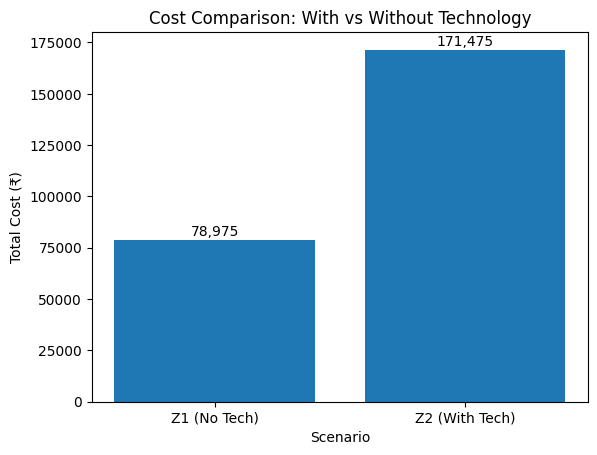

In [8]:
import matplotlib.pyplot as plt

# Data
labels = ["Z1 (No Tech)", "Z2 (With Tech)"]
values = [78975, 171475]

# Plot
plt.figure()
plt.bar(labels, values)
plt.title("Cost Comparison: With vs Without Technology")
plt.ylabel("Total Cost (₹)")
plt.xlabel("Scenario")

# Annotate values
for i, v in enumerate(values):
    plt.text(i, v + 2000, f"{v:,.0f}", ha="center")

plt.show()

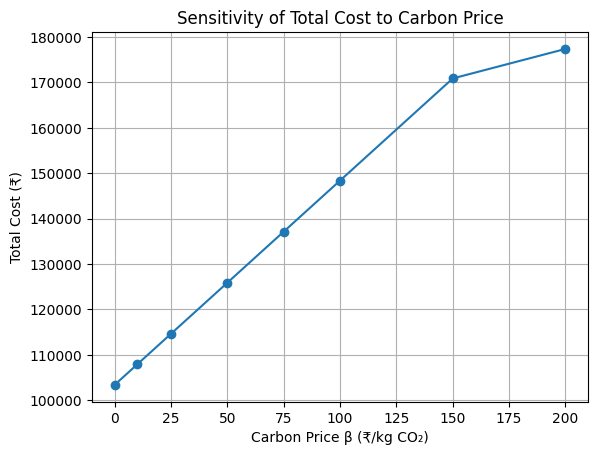

In [11]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

beta_values = [0, 10, 25, 50, 75, 100, 150, 200]
Z2_results = []

for beta in beta_values:
    model = gp.Model()
    model.setParam("OutputFlag", 0)

    # Variables
    RM = model.addVar(lb=0)
    OM = model.addVar(lb=0)
    t = {tech: model.addVar(vtype=GRB.BINARY) for tech in ["Solar","Biomass","Heat"]}

    # Constraints
    model.addConstr(RM + OM == 200)
    model.addConstr(RM <= 150)
    model.addConstr(OM <= 100)
    model.addConstr(sum(t.values()) == 1)

    # Z2 (simplified – manufacturing focus)
    Z2 = (
        15*RM + 22.5*OM
        + beta*3*(RM+OM)
        + sum(t[tech]*(TechCost[tech]-Subsidy[tech]) for tech in t)
        - sum(t[tech]*beta*3*(RM+OM)*RedEmiss[tech] for tech in t)
    )

    model.setObjective(Z2, GRB.MINIMIZE)
    model.optimize()

    Z2_results.append(model.objVal)

# Plot
plt.figure()
plt.plot(beta_values, Z2_results, marker='o')
plt.xlabel("Carbon Price β (₹/kg CO₂)")
plt.ylabel("Total Cost (₹)")
plt.title("Sensitivity of Total Cost to Carbon Price")
plt.grid(True)
plt.show()


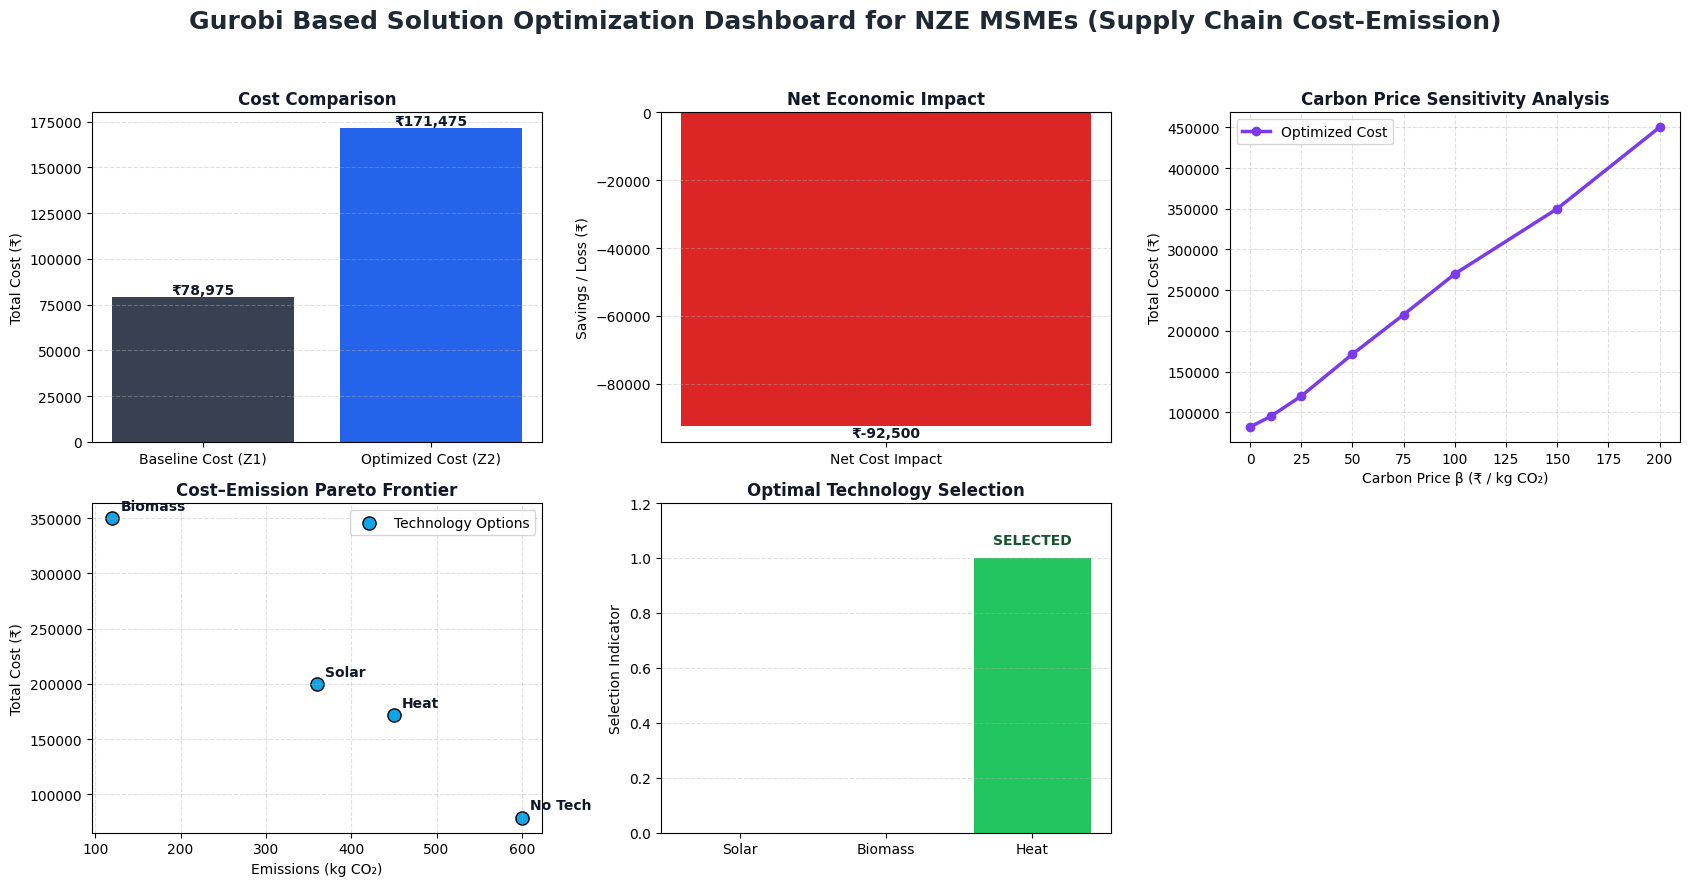

In [23]:
import matplotlib.pyplot as plt

# =========================
# Data
# =========================
Z1 = 78975
Z2 = 171475
cost_saving = Z1 - Z2

beta_vals = [0, 10, 25, 50, 75, 100, 150, 200]
Z2_beta = [82000, 95000, 120000, 171475, 220000, 270000, 350000, 450000]

emissions = [600, 360, 120, 450]
costs = [Z1, 200000, 350000, 171475]
labels = ["No Tech", "Solar", "Biomass", "Heat"]

techs = ["Solar", "Biomass", "Heat"]
selection = [0, 0, 1]

# =========================
# Dashboard
# =========================
fig, axs = plt.subplots(2, 3, figsize=(17, 9))

fig.suptitle(
    "Gurobi Based Solution Optimization Dashboard for NZE MSMEs (Supply Chain Cost-Emission)",
    fontsize=18,
    fontweight="bold",
    color="#1f2933"
)

# -------------------------
# (1) Z1 vs Z2
# -------------------------
bars = axs[0, 0].bar(
    ["Baseline Cost (Z1)", "Optimized Cost (Z2)"],
    [Z1, Z2],
    color=["#374151", "#2563eb"]  # dark gray vs strong blue
)
axs[0, 0].set_title("Cost Comparison", fontweight="bold", color="#111827")
axs[0, 0].set_ylabel("Total Cost (₹)")
axs[0, 0].grid(axis="y", linestyle="--", alpha=0.4)

for bar in bars:
    axs[0, 0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"₹{bar.get_height():,.0f}",
        ha="center",
        va="bottom",
        fontweight="bold",
        color="#111827"
    )

# -------------------------
# (2) Cost Saving
# -------------------------
axs[0, 1].bar(
    ["Net Cost Impact"],
    [cost_saving],
    color="#dc2626" if cost_saving < 0 else "#16a34a"
)
axs[0, 1].axhline(0, color="black", linewidth=1.5)
axs[0, 1].set_title("Net Economic Impact", fontweight="bold", color="#111827")
axs[0, 1].set_ylabel("Savings / Loss (₹)")
axs[0, 1].grid(axis="y", linestyle="--", alpha=0.4)

axs[0, 1].text(
    0,
    cost_saving,
    f"₹{cost_saving:,.0f}",
    ha="center",
    va="top" if cost_saving < 0 else "bottom",
    fontweight="bold",
    color="#111827"
)

# -------------------------
# (3) Carbon Price Sensitivity
# -------------------------
axs[0, 2].plot(
    beta_vals,
    Z2_beta,
    marker="o",
    linewidth=2.5,
    color="#7c3aed",
    label="Optimized Cost"
)
axs[0, 2].set_title(
    "Carbon Price Sensitivity Analysis",
    fontweight="bold",
    color="#111827"
)
axs[0, 2].set_xlabel("Carbon Price β (₹ / kg CO₂)")
axs[0, 2].set_ylabel("Total Cost (₹)")
axs[0, 2].grid(True, linestyle="--", alpha=0.4)
axs[0, 2].legend()

# -------------------------
# (4) Pareto Frontier
# -------------------------
axs[1, 0].scatter(
    emissions,
    costs,
    s=90,
    color="#0ea5e9",
    edgecolors="black",
    label="Technology Options"
)

for i, lbl in enumerate(labels):
    axs[1, 0].annotate(
        lbl,
        (emissions[i], costs[i]),
        textcoords="offset points",
        xytext=(6, 6),
        fontweight="bold",
        color="#111827"
    )

axs[1, 0].set_title(
    "Cost–Emission Pareto Frontier",
    fontweight="bold",
    color="#111827"
)
axs[1, 0].set_xlabel("Emissions (kg CO₂)")
axs[1, 0].set_ylabel("Total Cost (₹)")
axs[1, 0].grid(True, linestyle="--", alpha=0.4)
axs[1, 0].legend()

# -------------------------
# (5) Technology Selection
# -------------------------
colors = ["#9ca3af", "#9ca3af", "#22c55e"]  # selected = green
bars = axs[1, 1].bar(techs, selection, color=colors)

axs[1, 1].set_title(
    "Optimal Technology Selection",
    fontweight="bold",
    color="#111827"
)
axs[1, 1].set_ylabel("Selection Indicator")
axs[1, 1].set_ylim(0, 1.2)
axs[1, 1].grid(axis="y", linestyle="--", alpha=0.4)

for i, val in enumerate(selection):
    axs[1, 1].text(
        i,
        val + 0.05,
        "SELECTED" if val == 1 else "",
        ha="center",
        fontweight="bold",
        color="#14532d"
    )

# -------------------------
# Empty panel
# -------------------------
axs[1, 2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
